In [1]:
%pip install --prefer-binary jiminy-py[meshcat,plot]
%pip install --prefer-binary gym-jiminy[all]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# import os
# from pkg_resources import resource_filename

# import numpy as np

# import jiminy_py.core as jiminy  # The main module of jiminy - this is what gives access to the Robot
# from jiminy_py.simulator import Simulator


# data_root_path = resource_filename(
#     "gym_jiminy.envs", "data/quadrupedal_robots/anymal")
# urdf_path = os.path.join(data_root_path, "anymal.urdf")
import os
from pkg_resources import resource_filename

import numpy as np

import jiminy_py.core as jiminy  # The main module of jiminy - this is what gives access to the Robot
from jiminy_py.simulator import Simulator


data_root_path = resource_filename(
    "gym_jiminy.envs", "data/toys_models/simple_pendulum")
urdf_path = os.path.join(data_root_path, "simple_pendulum.urdf")

# Instantiate and initialize the robot
robot = jiminy.Robot()
robot.initialize(urdf_path, mesh_package_dirs=[data_root_path])

# Add a single motor
motor = jiminy.SimpleMotor("PendulumJoint")
robot.attach_motor(motor)
motor.initialize("PendulumJoint")

# Define the command: for now, the motor is off and doesn't modify the output torque.
def compute_command(t, q, v, sensors_data, command):
    command[:] = 0.0

# Instantiate and initialize the controller
controller = jiminy.ControllerFunctor()
controller.initialize(robot)

# Create a simulator using this robot and controller
simulator = Simulator(robot, controller)

# Set initial condition and simulation length
q0, v0 = np.array([0.1]), np.array([0.0])
simulation_duration = 10.0

# Launch the simulation
simulator.simulate(simulation_duration, q0, v0)




  0%|          | 0.00/10.0 [00:00<?]

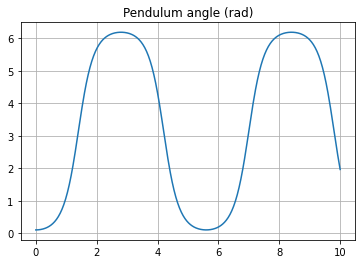

In [3]:
# Get dictionary of logged scalar variables
log_data = simulator.log_data

# Let's plot the joint position to see the pendulum fall.
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(log_data['Global.Time'], log_data['HighLevelController.currentPositionPendulum'])
plt.title('Pendulum angle (rad)')
plt.grid()
plt.show()

In [4]:
### Add the following to get rid of the stupid error and then restart runtime and run all:
# if q.shape == ():
#   q = np.array([q])

camera_xyzrpy = ([5.0, 0.0, 2.0e-5], [np.pi/2, 0.0, np.pi/2])

simulator.replay(camera_xyzrpy=camera_xyzrpy)


Rendering frames: 100%|██████████| 300/300 [00:04<00:00, 66.46it/s]


In [5]:
simulator.close()

In [6]:
import os
from pkg_resources import resource_filename

import numpy as np

import jiminy_py.core as jiminy  # The main module of jiminy - this is what gives access to the Robot
from jiminy_py.simulator import Simulator


data_root_path = resource_filename(
    "gym_jiminy.envs", "data/quadrupedal_robots/anymal")
urdf_path = os.path.join(data_root_path, "anymal.urdf")


# Instantiate and initialize the robot
robot = jiminy.Robot()
robot.initialize(urdf_path, mesh_package_dirs=[data_root_path])

motor_positions = ["LF_HAA", "LF_HFE", "LF_KFE", "RF_HAA", "RF_HFE", "RF_KFE", "LH_HAA", "LH_HFE", "LH_KFE", "RH_HAA", "RH_HFE", "RH_KFE"]

for pos in motor_positions:
  motor = jiminy.SimpleMotor(pos)
  robot.attach_motor(motor)
  motor.initialize(pos)

  # Define the command: for now, the motor is off and doesn't modify the output torque.
def compute_command(t, q, v, sensors_data, command):
    command[:] = 0.0

# Instantiate and initialize the controller
controller = jiminy.ControllerFunctor()
controller.initialize(robot)

# Create a simulator using this robot and controller
anymal_simulator = Simulator(robot, controller)

# Set initial condition and simulation length
q0, v0 = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,0.0,0.0,0.0]), np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,0.0,0.0,0.0])
simulation_duration = 10.0

# Launch the simulation
anymal_simulator.simulate(simulation_duration, q0, v0)

  0%|          | 0.00/10.0 [00:00<?]

In [7]:
camera_xyzrpy = ([5.0, 2.0, 1.0], [np.pi/2, 0.0, np.pi/1.5])

anymal_simulator.replay(camera_xyzrpy=camera_xyzrpy)


modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/base.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/drive.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/hip_l.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/drive.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/thigh.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/drive.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/shank_l.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/foot.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/

Rendering frames: 100%|██████████| 300/300 [00:18<00:00, 16.24it/s]


In [8]:
anymal_simulator.close()

In [9]:
from gym_jiminy.common.envs.env_locomotion import WalkerJiminyEnv

env = WalkerJiminyEnv(urdf_path = urdf_path, mesh_path= data_root_path)


modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/base.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/drive.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/hip_l.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/drive.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/thigh.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/drive.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/shank_l.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/foot.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/

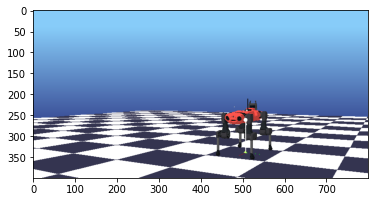

In [10]:
env.reset()

pic = env.render()

%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(pic)

In [11]:
env.reset()

for i in range(3000):
  env.step()

modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/base.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/drive.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/hip_l.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/drive.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/thigh.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/drive.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/shank_l.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/meshes/foot.dae
modelPath /usr/local/lib/python3.7/dist-packages/gym_jiminy/envs/data/quadrupedal_robots/anymal/

ERROR: Calling 'step' even though this environment has already returned done = True whereas terminal reward is enabled. Please call `reset` to avoid further undefined behavior.


In [12]:
camera_xyzrpy = ([5.0, 2.0, 1.0], [np.pi/2, 0.5, np.pi/1.5])
env.simulator.replay()

/usr/local/lib/python3.7/dist-packages/jiminy_py/viewer/replay.py:654: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  "At least one of the robot is locked, which means that a "
Rendering frames: 100%|██████████| 90/90 [00:04<00:00, 21.45it/s]
